In [538]:
#Bibek Shiwakoti

In [539]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import IsolationForest
warnings.filterwarnings("ignore")

## Importing a datasets and taking a quick glance

In [540]:
df_1 = pd.read_csv('1718Pcard.csv')
df_1.shape

(4931, 8)

In [541]:
df_1.head()

,FIN.TRANSACTION DATE,FIN.POSTING DATE,FIN.TRANSACTION AMOUNT,MCH.MERCHANT NAME,MCH.CITY NAME,FIN.ORIGINAL CURRENCY AMOUNT,FIN.ORIGINAL ISO CURRENCY CODE SYMBOL,FIN.INET CONVERSION
0,06/04/17,07/04/17,36.55,TESCO STORE 2296,COLNEY HATCH,36.55,GBP,1.0
1,06/04/17,07/04/17,58.75,AMFBOWLING.CO.UK,01442 840200,58.75,GBP,1.0
2,10/04/17,11/04/17,40.50,WWW.GOJUMPIN.COM,INTERNET,40.50,GBP,1.0
3,12/04/17,13/04/17,23.90,AMFBOWLING.CO.UK,01442 840200,23.90,GBP,1.0
4,12/04/17,13/04/17,24.28,VUE BSL LTD,LONDON,24.28,GBP,1.0


In [542]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4931 entries, 0 to 4930
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   FIN.TRANSACTION DATE                   4931 non-null   object 
 1   FIN.POSTING DATE                       4931 non-null   object 
 2   FIN.TRANSACTION AMOUNT                 4931 non-null   object 
 3   MCH.MERCHANT NAME                      4931 non-null   object 
 4   MCH.CITY NAME                          4927 non-null   object 
 5   FIN.ORIGINAL CURRENCY AMOUNT           4931 non-null   object 
 6   FIN.ORIGINAL ISO CURRENCY CODE SYMBOL  4931 non-null   object 
 7   FIN.INET CONVERSION                    4931 non-null   float64
dtypes: float64(1), object(7)
memory usage: 308.3+ KB


In [543]:
df_1['FIN.TRANSACTION AMOUNT'] = pd.to_numeric(df_1['FIN.TRANSACTION AMOUNT'], errors='coerce')
df_1['FIN.ORIGINAL CURRENCY AMOUNT'] = pd.to_numeric(df_1['FIN.ORIGINAL CURRENCY AMOUNT'], errors='coerce')

In [544]:
df_1['FIN.TRANSACTION DATE'] = pd.to_datetime(df_1['FIN.TRANSACTION DATE'], format='%d/%m/%y')

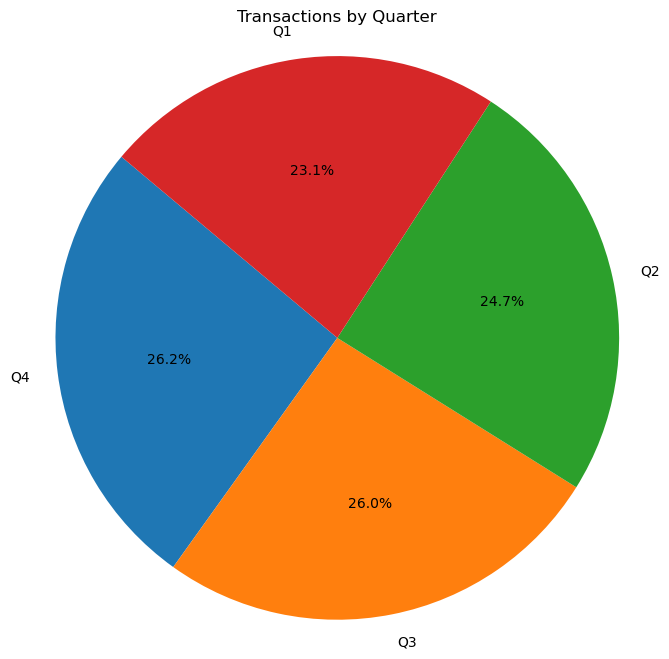

In [545]:

# Extract quarter information
df_1['Quarter'] = df_1['FIN.TRANSACTION DATE'].dt.quarter

# Map quarters to respective quarter names
quarter_names = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_1['Quarter'] = df_1['Quarter'].map(quarter_names)

# Count occurrences of each quarter
quarter_counts = df_1['Quarter'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(quarter_counts, labels=quarter_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transactions by Quarter')
plt.axis('equal')
plt.show()


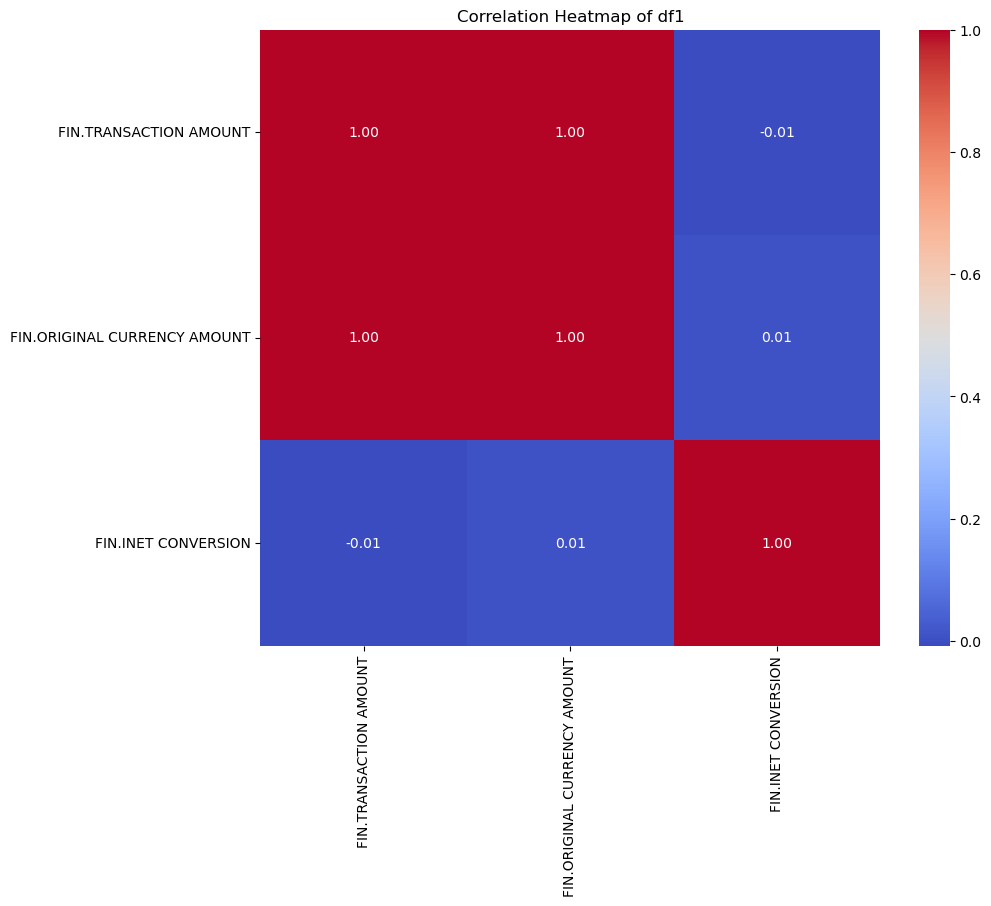

In [546]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_1.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of df1')
plt.show()


correlation matrix shows that column FIN.TRANSACTION AMOUNT and FIN.ORIGINAL CURRENCY AMOUNT are identical with correlation of 1

In [547]:
df_1.drop(columns='FIN.ORIGINAL CURRENCY AMOUNT',inplace =True)  #dropping this column because this is replica of another column already

In [548]:
df_1.head()

,FIN.TRANSACTION DATE,FIN.POSTING DATE,FIN.TRANSACTION AMOUNT,MCH.MERCHANT NAME,MCH.CITY NAME,FIN.ORIGINAL ISO CURRENCY CODE SYMBOL,FIN.INET CONVERSION,Quarter
0,2017-04-06,07/04/17,36.55,TESCO STORE 2296,COLNEY HATCH,GBP,1.0,Q2
1,2017-04-06,07/04/17,58.75,AMFBOWLING.CO.UK,01442 840200,GBP,1.0,Q2
2,2017-04-10,11/04/17,40.50,WWW.GOJUMPIN.COM,INTERNET,GBP,1.0,Q2
3,2017-04-12,13/04/17,23.90,AMFBOWLING.CO.UK,01442 840200,GBP,1.0,Q2
4,2017-04-12,13/04/17,24.28,VUE BSL LTD,LONDON,GBP,1.0,Q2


In [549]:
df_2 = pd.read_csv('PCard 1617.csv')
df_2.shape

(4582, 6)

In [550]:
df_2.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,05/12/2016,10510.0,45.00
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,05/12/2016,10509.0,426.57
2,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK RETAIL AMAZO,06/12/2016,10524.0,121.38
3,Adults and Communities,Consumable Catering Supplies,WWW.ARGOS.CO.UK,01/03/2017,11667.0,78.94
4,Adults and Communities,CSG - IT,AMAZON UK MARKETPLACE,01/02/2017,10974.0,97.50


In [551]:
# as given that journal date and transaction date are synonymous we can rename column
df_2.rename(columns={"Journal Date": "Transaction Date"}, inplace='True')
df_2.head(10)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,05/12/2016,10510.0,45.00
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,05/12/2016,10509.0,426.57
2,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK RETAIL AMAZO,06/12/2016,10524.0,121.38
3,Adults and Communities,Consumable Catering Supplies,WWW.ARGOS.CO.UK,01/03/2017,11667.0,78.94
4,Adults and Communities,CSG - IT,AMAZON UK MARKETPLACE,01/02/2017,10974.0,97.50
5,Adults and Communities,CSG - IT,AMAZON UK MARKETPLACE,21/12/2016,10742.0,97.50
6,Adults and Communities,CSG - IT,AMAZON UK RETAIL AMAZO,01/02/2017,10975.0,62.40
7,Adults and Communities,Electricity,E.ON ENERGY SOLUTIONS,11/01/2017,11245.0,"3,569.03"
8,Adults and Communities,Equipment and Materials Purcha,AMAZON EU,02/02/2017,10976.0,16.98
9,Adults and Communities,Equipment and Materials Purcha,"AMAZON SVCS EUROPE,SAR",13/10/2016,9819.0,3.95


In [552]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4582 entries, 0 to 4581
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         4582 non-null   object 
 1   Account Description  4581 non-null   object 
 2   Creditor             4581 non-null   object 
 3   Transaction Date     4581 non-null   object 
 4   Journal Reference    4581 non-null   float64
 5   Total                4582 non-null   object 
dtypes: float64(1), object(5)
memory usage: 214.9+ KB


In [553]:
df_2['Transaction Date'] = pd.to_datetime(df_2['Transaction Date'], format='%d/%m/%Y')

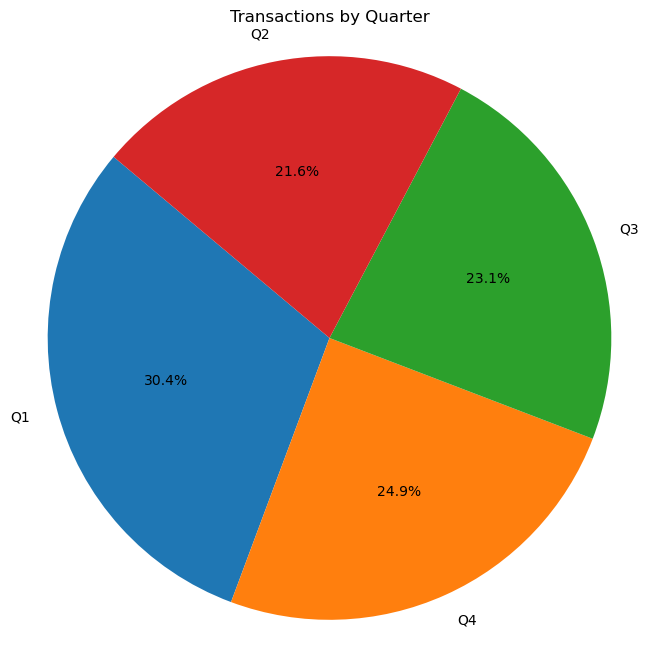

In [554]:

# Extract quarter information
df_2['Quarter'] = df_2['Transaction Date'].dt.quarter

# Map quarters to respective quarter names
quarter_names = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_2['Quarter'] = df_2['Quarter'].map(quarter_names)

# Count occurrences of each quarter
quarter_counts = df_2['Quarter'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(quarter_counts, labels=quarter_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transactions by Quarter')
plt.axis('equal')
plt.show()


In [555]:
df_2['Service Area'].value_counts()


Children's Family Services       3639
Streetscene                       207
Commissioning                     204
Assurance                         193
Adults and Communities            170
Children's Service DSG             79
Customer Support Group             40
Children's Education & Skills      35
Parking & Infrastructure            8
Regional Enterprise                 4
HRA                                 1
Public Health                       1
Grand Total                         1
Name: Service Area, dtype: int64

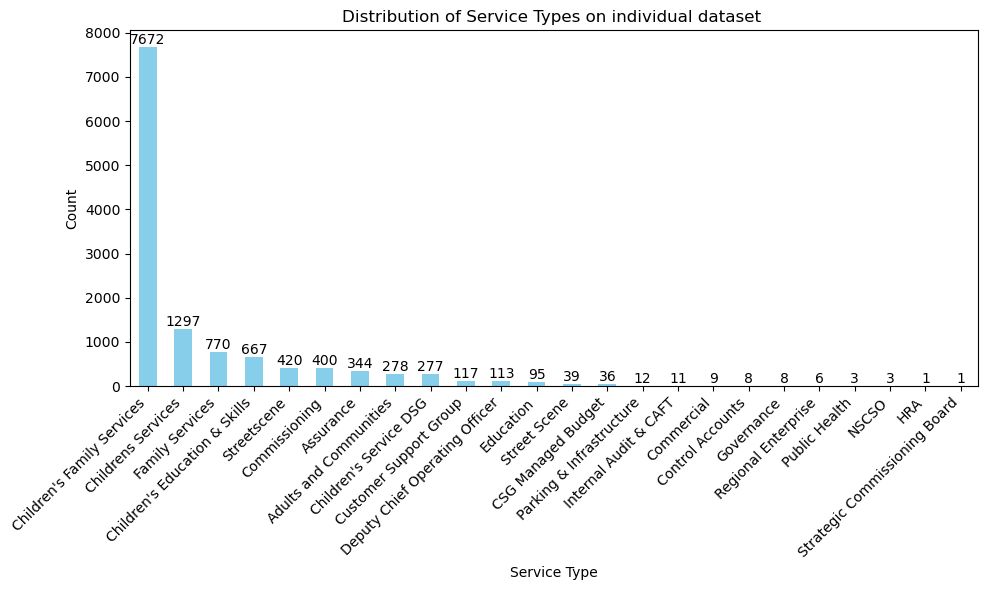

In [556]:
plt.figure(figsize=(10, 6))
ax = service_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Service Types on individual dataset ')
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  

# Adding annotations to each bar
for i, count in enumerate(service_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [557]:
df_3 = pd.read_csv('PCard Transactions 15-16.txt')
df_3.shape

(3865, 6)

In [558]:
df_3.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,18/08/2015,5043.0,2
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,08/06/2015,4184.0,29.97
2,Children's Family Services,E19 - Learning Resources,99P STORES LTD,07/12/2015,6278.0,34.65
3,Children's Family Services,Equipment and Materials Purcha,99P STORES LTD,18/08/2015,5041.0,10.72
4,Children's Family Services,Subsistence,CHOPSTIX00000000000,21/05/2015,5750.0,33.7


In [559]:
# as given that journal date and transaction date are synonymous we can rename column
df_3.rename(columns={"Journal Date": "Transaction Date"}, inplace='True')
df_3.head()

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,18/08/2015,5043.0,2
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,08/06/2015,4184.0,29.97
2,Children's Family Services,E19 - Learning Resources,99P STORES LTD,07/12/2015,6278.0,34.65
3,Children's Family Services,Equipment and Materials Purcha,99P STORES LTD,18/08/2015,5041.0,10.72
4,Children's Family Services,Subsistence,CHOPSTIX00000000000,21/05/2015,5750.0,33.7


In [560]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         3864 non-null   object 
 1   Account Description  3864 non-null   object 
 2   Creditor             3864 non-null   object 
 3   Transaction Date     3864 non-null   object 
 4   Journal Reference    3864 non-null   float64
 5   Total                3865 non-null   object 
dtypes: float64(1), object(5)
memory usage: 181.3+ KB


In [561]:
df_3['Transaction Date'] = pd.to_datetime(df_3['Transaction Date'], format='%d/%m/%Y')

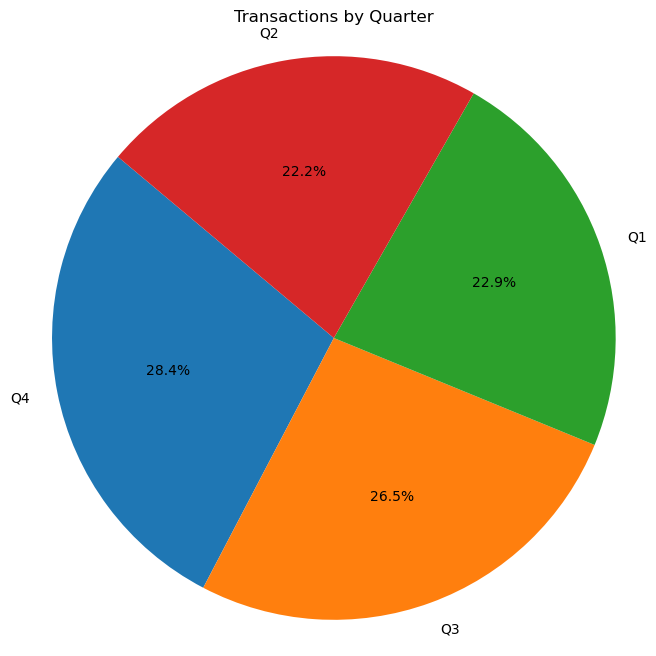

In [562]:
# Extract quarter information
df_3['Quarter'] = df_3['Transaction Date'].dt.quarter

# Map quarters to respective quarter names
quarter_names = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_3['Quarter'] = df_3['Quarter'].map(quarter_names)

# Count occurrences of each quarter
quarter_counts = df_3['Quarter'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(quarter_counts, labels=quarter_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transactions by Quarter')
plt.axis('equal')
plt.show()

In [563]:
df_3['Service Area'].value_counts()

Children's Family Services       2829
Children's Education & Skills     395
Streetscene                       151
Assurance                         144
Commissioning                     123
Children's Service DSG            120
Adults and Communities             55
Customer Support Group             45
Parking & Infrastructure            1
Regional Enterprise                 1
Name: Service Area, dtype: int64

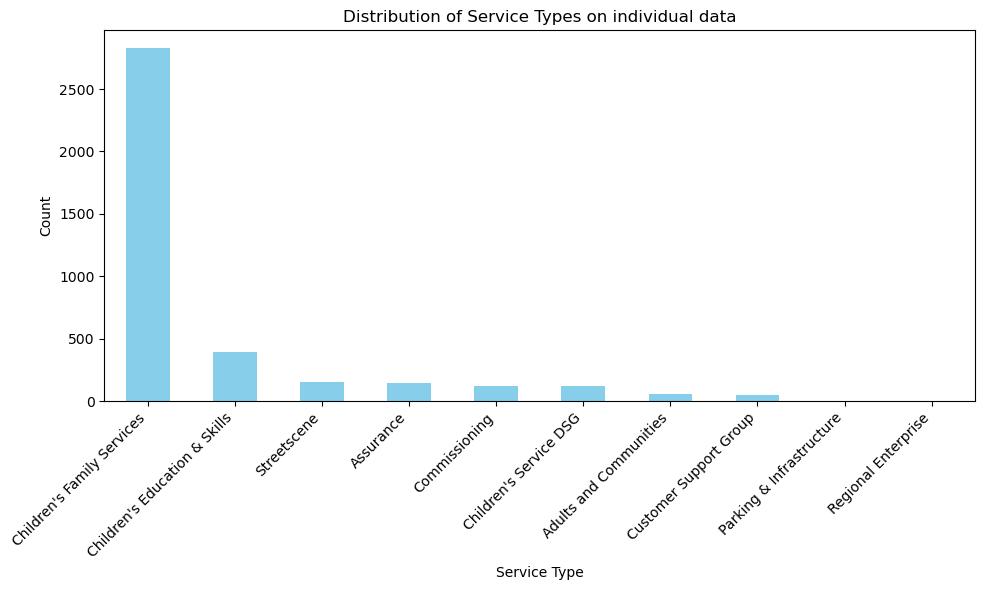

In [564]:
service_counts = df_3['Service Area'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Service Types on individual data')
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [565]:
df_4 = pd.read_csv('Purchasing Card Data 2014 v1.csv')
df_4.shape

(4142, 7)

In [566]:
df_4.rename(columns={"JV Value": "Total"}, inplace='True')
df_4.head()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Date,Total
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,20/05/2014,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111,20/05/2014,"6,000.00"
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6,20/05/2014,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7,20/05/2014,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381,20/05/2014,306


In [567]:
df_4.drop(columns='JV Date', inplace = True)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Service Area         4142 non-null   object
 1   Account Description  4142 non-null   object
 2   Creditor             4142 non-null   object
 3   Transaction Date     4142 non-null   object
 4   JV Reference         4142 non-null   int64 
 5   Total                4142 non-null   object
dtypes: int64(1), object(5)
memory usage: 194.3+ KB


In [568]:
df_4['Transaction Date'] = pd.to_datetime(df_4['Transaction Date'], format='%d/%m/%Y')

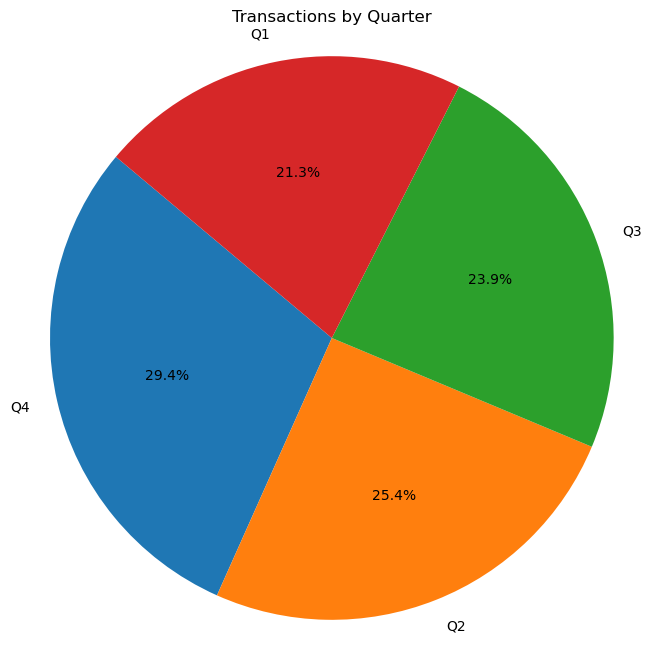

In [569]:
# Extract quarter information
df_4['Quarter'] = df_4['Transaction Date'].dt.quarter

# Map quarters to respective quarter names
quarter_names = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_4['Quarter'] = df_4['Quarter'].map(quarter_names)

# Count occurrences of each quarter
quarter_counts = df_4['Quarter'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(quarter_counts, labels=quarter_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transactions by Quarter')
plt.axis('equal')
plt.show()

In [570]:
df_4['Service Area'].value_counts()

Childrens Services                1297
Children's Family Services        1204
Family Services                    770
Children's Education & Skills      237
Deputy Chief Operating Officer     113
Education                           95
Children's Service DSG              78
Commissioning                       73
Streetscene                         62
Adults and Communities              53
Street Scene                        39
CSG Managed Budget                  36
Customer Support Group              32
Internal Audit & CAFT               11
Commercial                           9
Governance                           8
Control Accounts                     8
Assurance                            7
Parking & Infrastructure             3
NSCSO                                3
Public Health                        2
Strategic Commissioning Board        1
Regional Enterprise                  1
Name: Service Area, dtype: int64

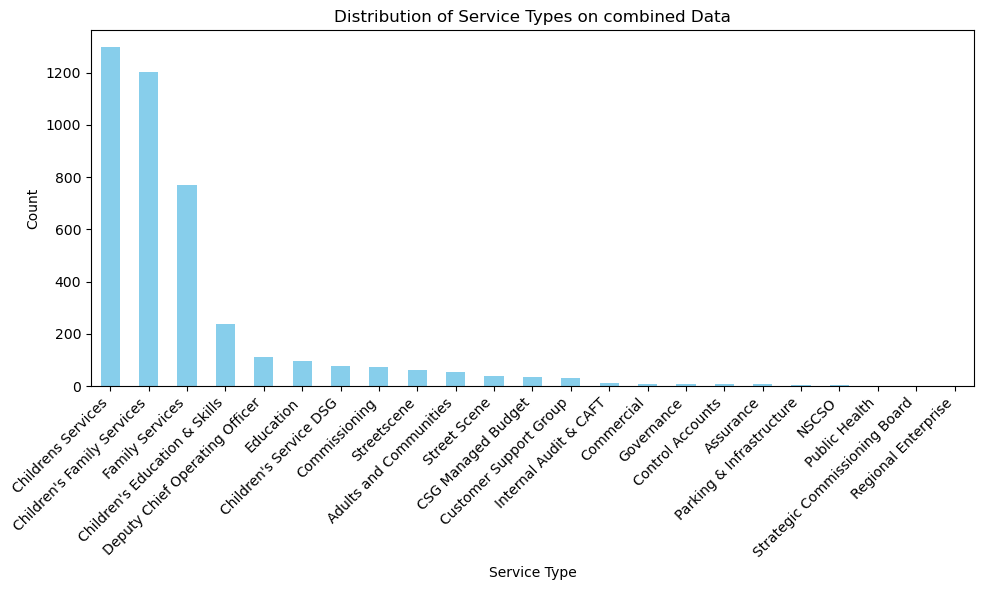

In [571]:
# Counting the occurrences of each service area
service_counts = df_4['Service Area'].value_counts()

plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Service Types on combined Data')
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [572]:
df_1.head(1)

,FIN.TRANSACTION DATE,FIN.POSTING DATE,FIN.TRANSACTION AMOUNT,MCH.MERCHANT NAME,MCH.CITY NAME,FIN.ORIGINAL ISO CURRENCY CODE SYMBOL,FIN.INET CONVERSION,Quarter
0,2017-04-06,07/04/17,36.55,TESCO STORE 2296,COLNEY HATCH,GBP,1.0,Q2


In [573]:
df_2['original_df_number'] =2

In [574]:
df_2.head(2)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,original_df_number
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,2016-12-05,10510.0,45.00,Q4,2
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,2016-12-05,10509.0,426.57,Q4,2


In [575]:
# Check for duplicate values in the 'JV Reference' column
# Count the number of duplicate values in the 'JV Reference' column
num_duplicates = df_2['Journal Reference'].duplicated().sum()

print("Number of duplicate values in the 'Journal Reference' column:", num_duplicates)


Number of duplicate values in the 'Journal Reference' column: 180


In [576]:
df_3['original_df_number'] =3

In [577]:
df_3.head(2)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,original_df_number
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,2015-08-18,5043.0,2,Q3,3
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,2015-06-08,4184.0,29.97,Q2,3


In [578]:
# Counting the number of duplicate values in the 'JV Reference' column
num_duplicates = df_3['Journal Reference'].duplicated().sum()

print("Number of duplicate values in the 'Journal Reference' column:", num_duplicates)


Number of duplicate values in the 'Journal Reference' column: 377


In [579]:
df_4['original_df_number'] =4

In [580]:
df_4.head(2)

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,Total,Quarter,original_df_number
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93,143.81,Q2,4
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-04-03,111,"6,000.00",Q2,4


In [581]:
# Check for duplicate values in the 'JV Reference' column
# Count the number of duplicate values in the 'JV Reference' column
num_duplicates = df_4['JV Reference'].duplicated().sum()

print("Number of duplicate values in the 'JV Reference' column:", num_duplicates)

Number of duplicate values in the 'JV Reference' column: 0


In [582]:
# as Jv reference column has unique values and also we have differentiated the datasets with unique original_df_number
# now I am merging the three datasets as they have the same columns 

In [583]:
df_4.rename(columns={"JV Reference": "Journal Reference"}, inplace='True')

In [584]:
df_4.head()

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,original_df_number
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93,143.81,Q2,4
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-04-03,111,"6,000.00",Q2,4
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,6,309.38,Q2,4
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,7,218.76,Q2,4
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,2014-04-15,381,306,Q2,4


## Merging DataFrames

In [585]:
df_a = df_1.copy()

In [586]:
df_4.columns

Index(['Service Area', 'Account Description', 'Creditor', 'Transaction Date',
       'Journal Reference', 'Total', 'Quarter', 'original_df_number'],
      dtype='object')

In [587]:
(df_2.shape[0]+df_3.shape[0]+df_4.shape[0])

12589

In [588]:
# Concatenate the DataFrames vertically
df_b = pd.concat([df_2, df_3, df_4], ignore_index=True)



In [589]:
df_b.shape

(12589, 8)

In [590]:
df_b.head()

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,original_df_number
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,2016-12-05,10510.0,45.00,Q4,2
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,2016-12-05,10509.0,426.57,Q4,2
2,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK RETAIL AMAZO,2016-12-06,10524.0,121.38,Q4,2
3,Adults and Communities,Consumable Catering Supplies,WWW.ARGOS.CO.UK,2017-03-01,11667.0,78.94,Q1,2
4,Adults and Communities,CSG - IT,AMAZON UK MARKETPLACE,2017-02-01,10974.0,97.50,Q1,2


In [591]:
df_a.shape

(4931, 8)

In [592]:
df_a.head()

,FIN.TRANSACTION DATE,FIN.POSTING DATE,FIN.TRANSACTION AMOUNT,MCH.MERCHANT NAME,MCH.CITY NAME,FIN.ORIGINAL ISO CURRENCY CODE SYMBOL,FIN.INET CONVERSION,Quarter
0,2017-04-06,07/04/17,36.55,TESCO STORE 2296,COLNEY HATCH,GBP,1.0,Q2
1,2017-04-06,07/04/17,58.75,AMFBOWLING.CO.UK,01442 840200,GBP,1.0,Q2
2,2017-04-10,11/04/17,40.50,WWW.GOJUMPIN.COM,INTERNET,GBP,1.0,Q2
3,2017-04-12,13/04/17,23.90,AMFBOWLING.CO.UK,01442 840200,GBP,1.0,Q2
4,2017-04-12,13/04/17,24.28,VUE BSL LTD,LONDON,GBP,1.0,Q2


In [593]:
df_b.head()

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,original_df_number
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,2016-12-05,10510.0,45.00,Q4,2
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,2016-12-05,10509.0,426.57,Q4,2
2,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK RETAIL AMAZO,2016-12-06,10524.0,121.38,Q4,2
3,Adults and Communities,Consumable Catering Supplies,WWW.ARGOS.CO.UK,2017-03-01,11667.0,78.94,Q1,2
4,Adults and Communities,CSG - IT,AMAZON UK MARKETPLACE,2017-02-01,10974.0,97.50,Q1,2


In [594]:
# now as there is no visible relationship between dataframe a (df_a) and (df_b) I am going to analyze them separately

## Handling missing values

In [595]:
df_a.isnull().sum()

FIN.TRANSACTION DATE                      0
FIN.POSTING DATE                          0
FIN.TRANSACTION AMOUNT                   29
MCH.MERCHANT NAME                         0
MCH.CITY NAME                             4
FIN.ORIGINAL ISO CURRENCY CODE SYMBOL     0
FIN.INET CONVERSION                       0
Quarter                                   0
dtype: int64

In [596]:
df_a.shape

(4931, 8)

In [597]:
df_a.dropna(inplace=True)

In [598]:
df_a['FIN.TRANSACTION AMOUNT'] = df_a['FIN.TRANSACTION AMOUNT'].abs()

In [599]:
df_a.shape

(4898, 8)

In [600]:
df_a.isnull().sum()

FIN.TRANSACTION DATE                     0
FIN.POSTING DATE                         0
FIN.TRANSACTION AMOUNT                   0
MCH.MERCHANT NAME                        0
MCH.CITY NAME                            0
FIN.ORIGINAL ISO CURRENCY CODE SYMBOL    0
FIN.INET CONVERSION                      0
Quarter                                  0
dtype: int64

In [601]:
df_b.isnull().sum()

Service Area           1
Account Description    2
Creditor               2
Transaction Date       2
Journal Reference      2
Total                  0
Quarter                2
original_df_number     0
dtype: int64

In [602]:
df_b.shape

(12589, 8)

In [603]:
df_b.dropna(inplace=True)

In [604]:
df_b.shape

(12587, 8)

In [605]:
df_b['Total'] = df_b['Total'].str.replace(',', '').astype(float)

In [606]:
df_b['Total'] = df_b['Total'].abs()

In [607]:
df_b.isnull().sum()

Service Area           0
Account Description    0
Creditor               0
Transaction Date       0
Journal Reference      0
Total                  0
Quarter                0
original_df_number     0
dtype: int64

## Q.1 

The Auditor would like to get a summary view of the transactions for each Service Area. The summary view would include at least one visual representation of the transactions in such a way that they could compare them by quarter. Quarters are defined based on the calendar year (Q1 is January to March, Q2 April to June, etc.). The Auditor would also like a summary table with some relevant statistics (The Auditor says something along the lines of “transaction counts and averages”, but welcomes ideas). 

## Creating summary view of the transactions for each Service Area.

In [608]:
df_a.describe().round(2)

,FIN.TRANSACTION AMOUNT,FIN.INET CONVERSION
count,4898.00,4898.00
mean,79.35,1.00
std,118.04,0.02
min,0.01,1.00
25%,12.51,1.00
50%,30.05,1.00
75%,96.73,1.00
max,999.00,1.37


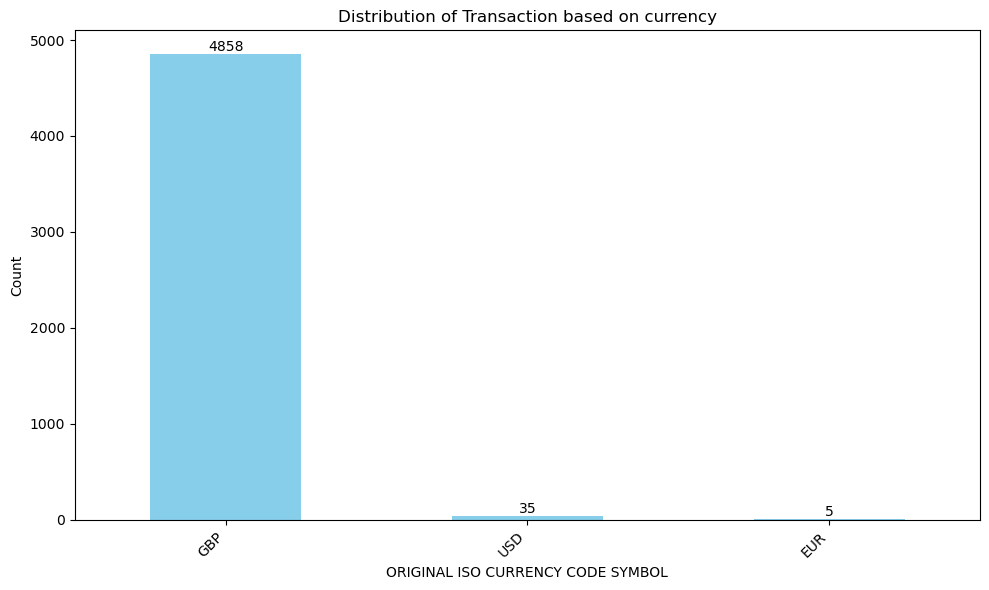

In [609]:
service_counts = df_a['FIN.ORIGINAL ISO CURRENCY CODE SYMBOL'].value_counts()

plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transaction based on currency')
plt.xlabel('ORIGINAL ISO CURRENCY CODE SYMBOL')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  

# Annotating each bar
for i, count in enumerate(service_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

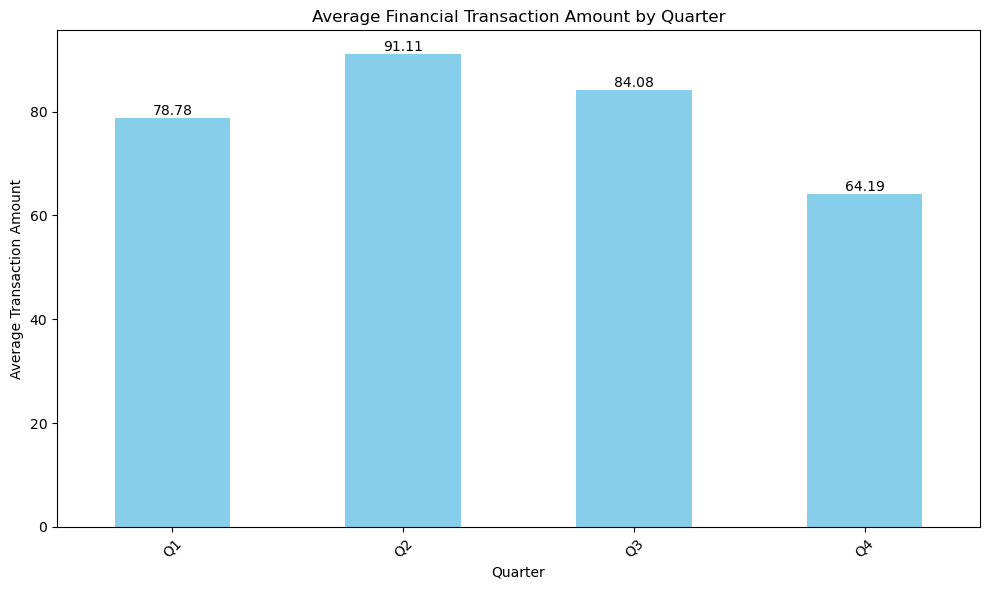

In [610]:
average_by_quarter = df_a.groupby('Quarter')['FIN.TRANSACTION AMOUNT'].mean()

plt.figure(figsize=(10, 6))
average_by_quarter.plot(kind='bar', color='skyblue')

for i, value in enumerate(average_by_quarter):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('Average Financial Transaction Amount by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [611]:
df_b[['Journal Reference','Total']].describe().round(2)

,Journal Reference,Total
count,12587.00,12587.00
mean,6126.85,104.73
std,3248.97,390.10
min,1.00,0.00
25%,3943.50,11.03
50%,5795.00,28.25
75%,8847.50,95.00
max,12136.00,15340.80


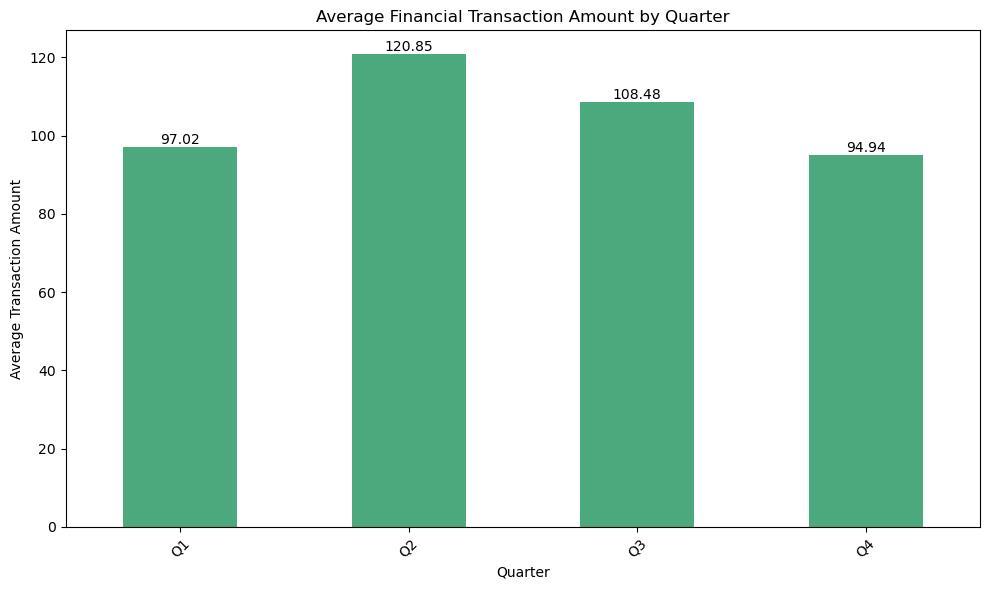

In [612]:
average_by_quarter = df_b.groupby('Quarter')['Total'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
average_by_quarter.plot(kind='bar', color='#4CA97D')

# Annotating the bar graph with the average values
for i, value in enumerate(average_by_quarter):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('Average Financial Transaction Amount by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [613]:
# listing all Service Areas
df_b['Service Area'].unique()

array(['Adults and Communities', 'Assurance',
       "Children's Education & Skills", "Children's Family Services",
       "Children's Service DSG", 'Commissioning',
       'Customer Support Group', 'HRA', 'Parking & Infrastructure',
       'Public Health', 'Regional Enterprise', 'Streetscene',
       'Childrens Services', 'Control Accounts', 'Street Scene',
       'Governance', 'Deputy Chief Operating Officer',
       'Internal Audit & CAFT', 'NSCSO', 'CSG Managed Budget',
       'Strategic Commissioning Board', 'Family Services', 'Education',
       'Commercial'], dtype=object)

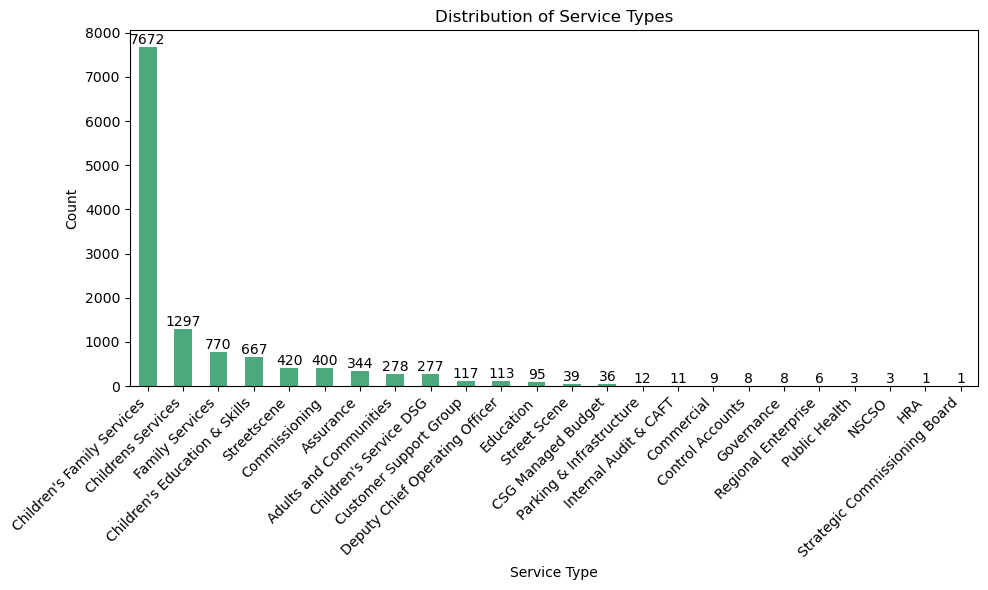

In [614]:
# Count occurrences of each service area
service_counts = df_b['Service Area'].value_counts()

plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='#4CA97D')
plt.title('Distribution of Service Types')
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  

for i, count in enumerate(service_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


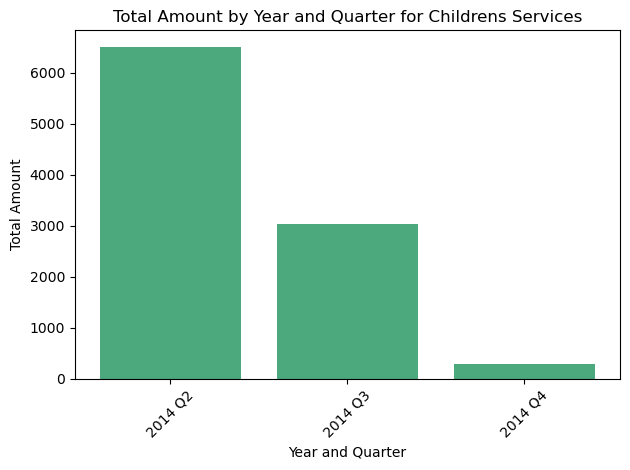

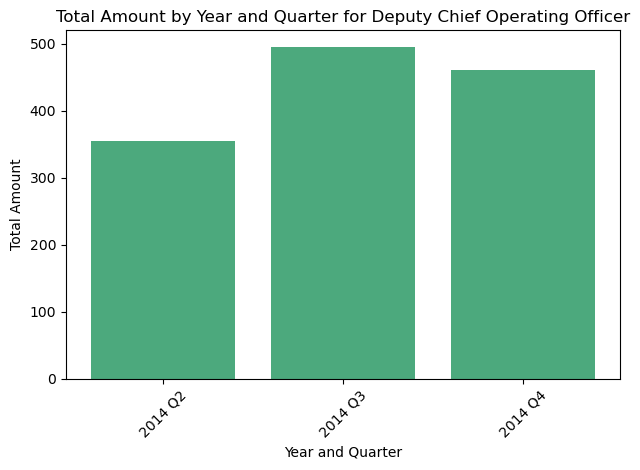

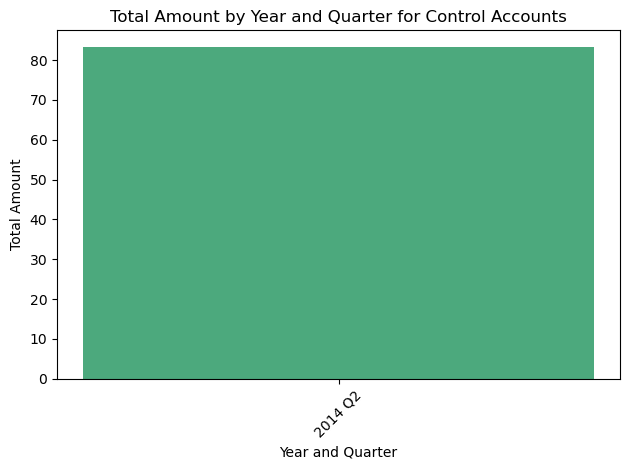

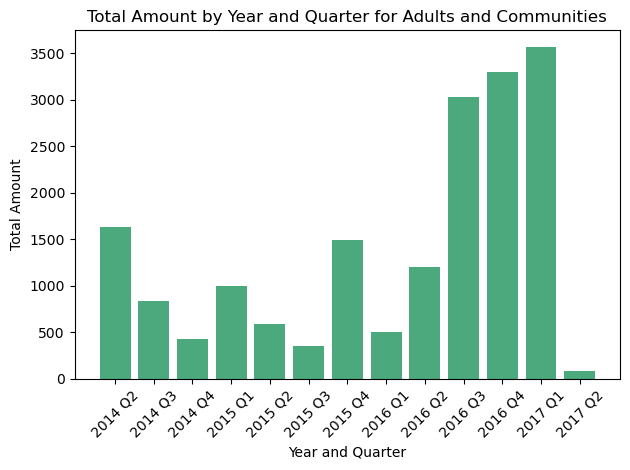

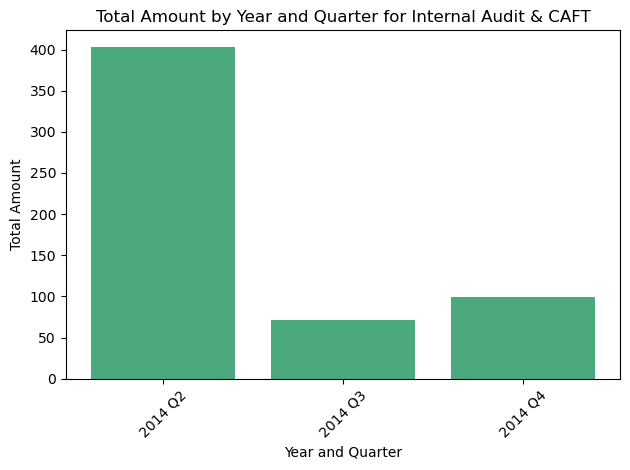

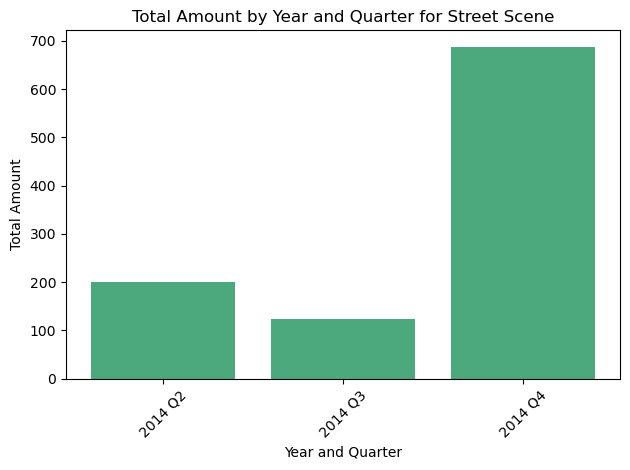

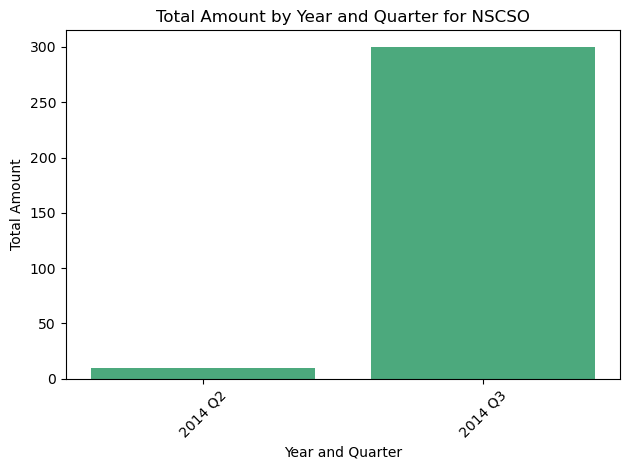

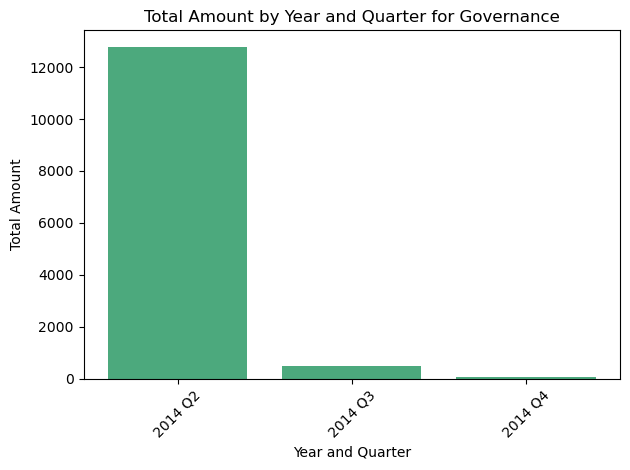

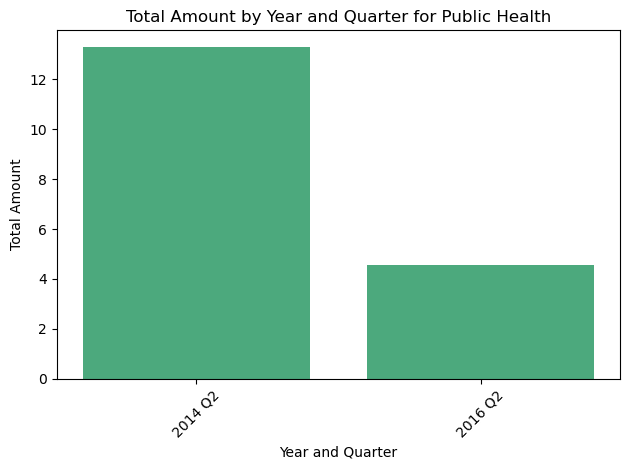

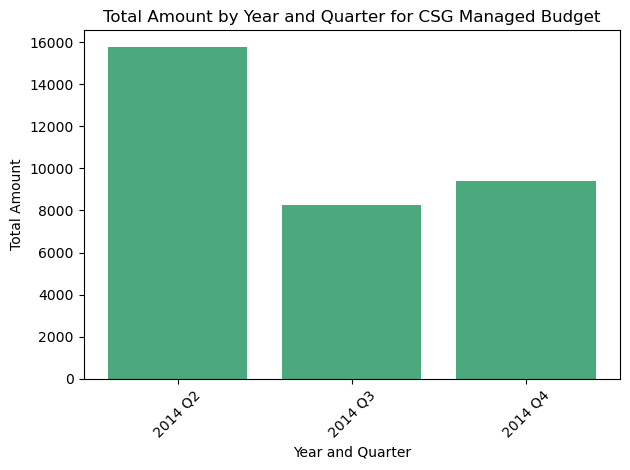

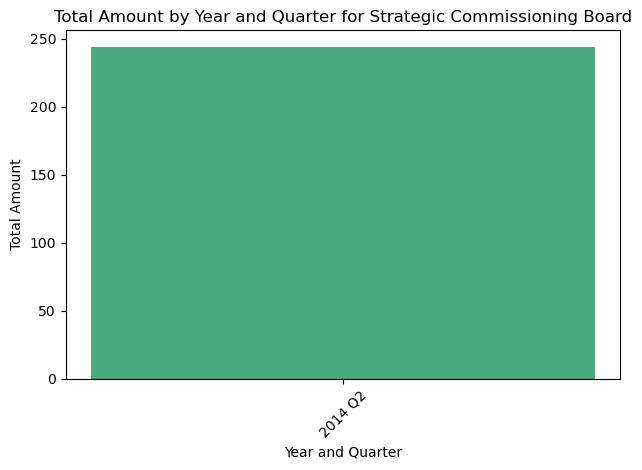

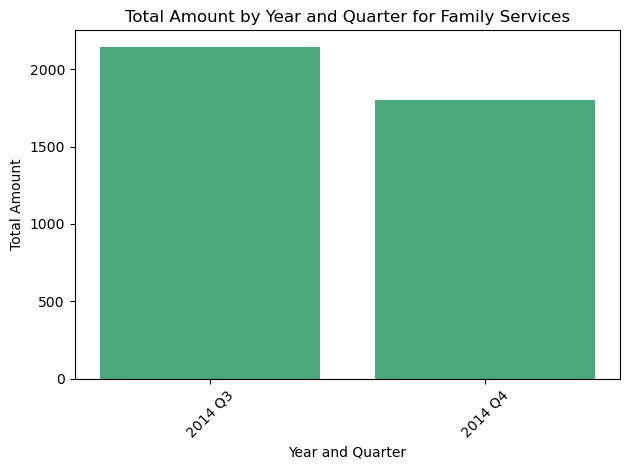

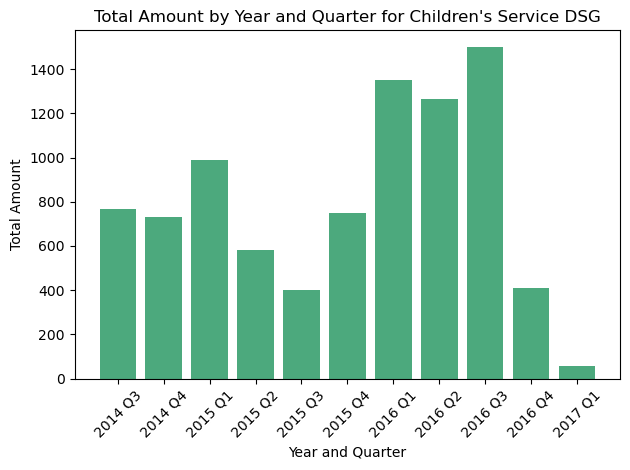

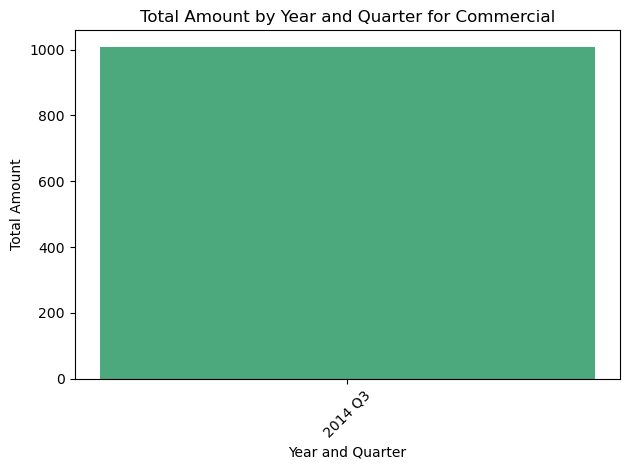

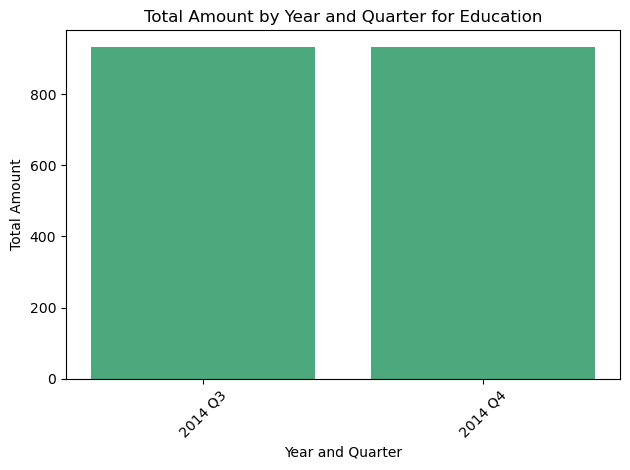

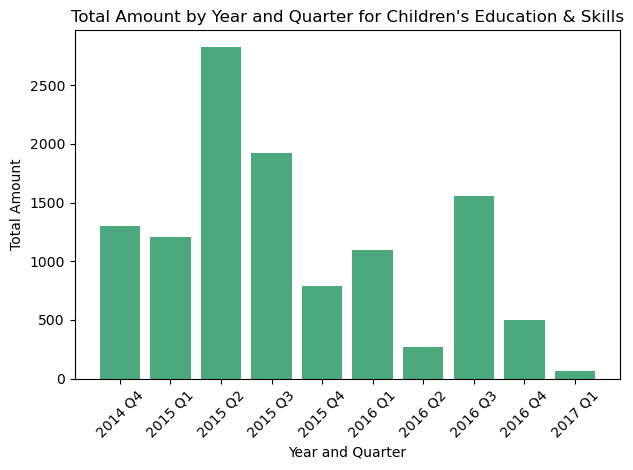

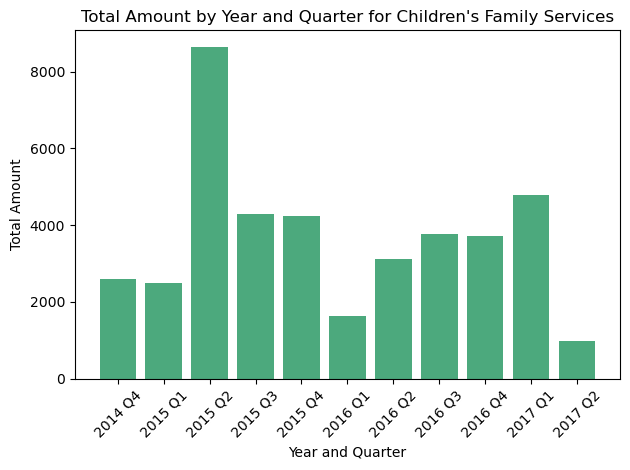

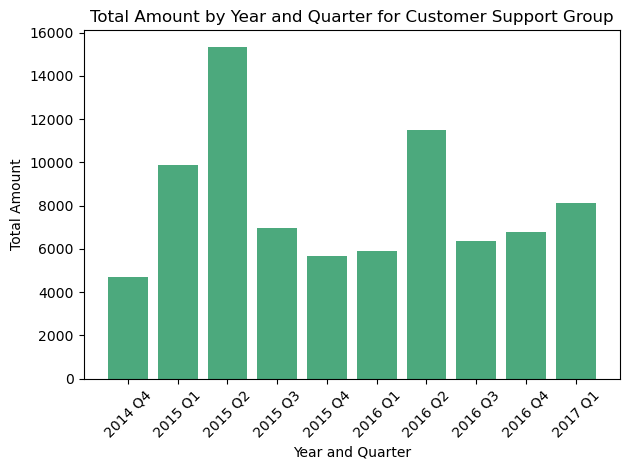

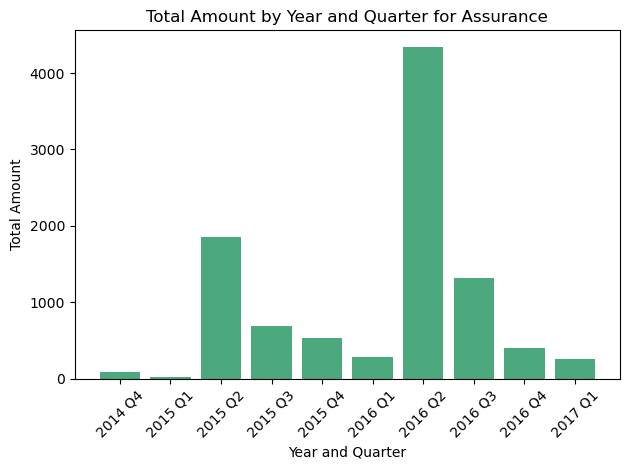

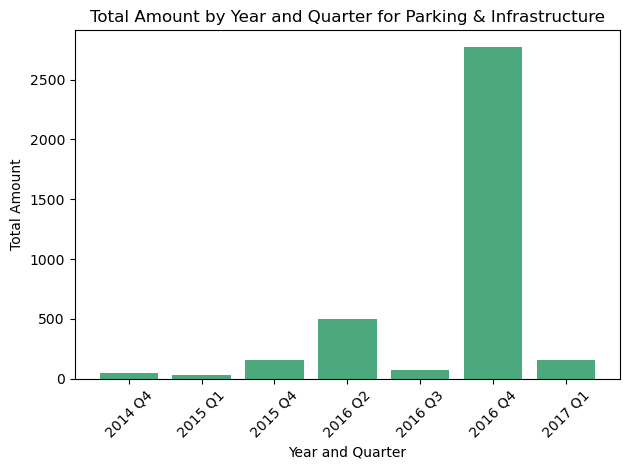

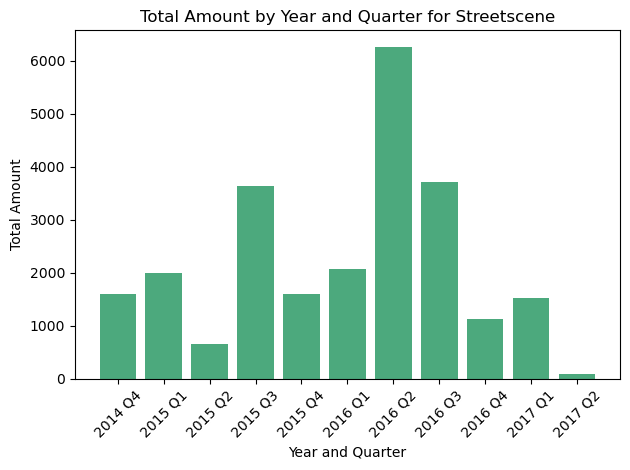

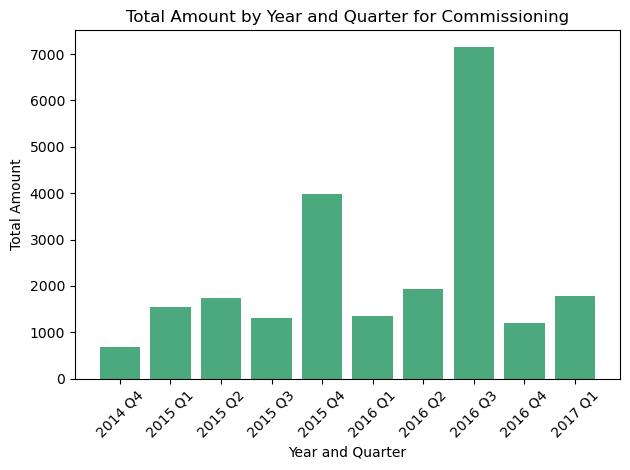

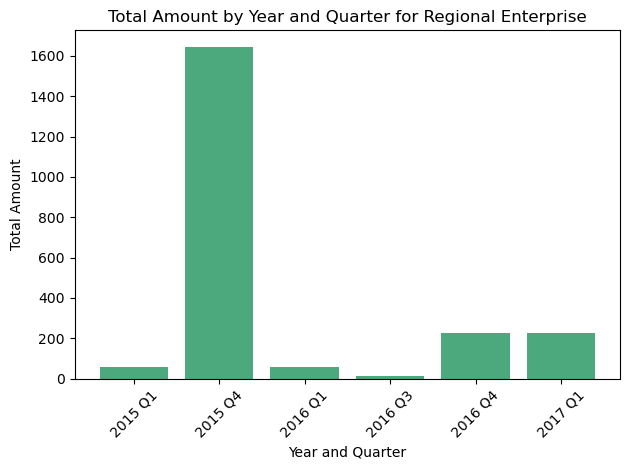

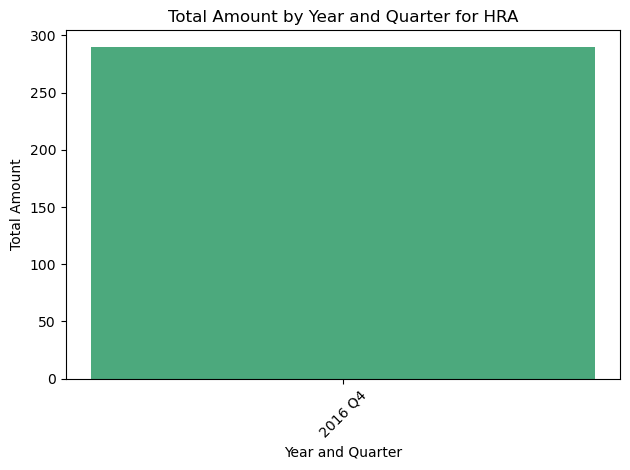

In [615]:
# Printing the Total amount of each area Quarter wise

# Grouping by year, quarter, and service area and calculate total amount
grouped = df_b.groupby(['Transaction Date', 'Quarter', 'Service Area'])['Total'].sum().reset_index()

service_areas = grouped['Service Area'].unique()

# Iterating through each service area
for service_area in service_areas:
    # Filtering data for the current service area
    area_data = grouped[grouped['Service Area'] == service_area]
    
    # Createing a figure for each service area
    plt.figure()
    
    x_labels = (area_data['Transaction Date'].dt.year.astype(str) + ' ' +
                area_data['Quarter'])
    
    plt.bar(x_labels, area_data['Total'], color='#4CA97D')
    
    plt.xlabel('Year and Quarter')
    plt.ylabel('Total Amount')
    plt.title(f'Total Amount by Year and Quarter for {service_area}')
    plt.xticks(rotation=45)  
    plt.tight_layout()

plt.show()


In [616]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_b['Year'] = df_b['Transaction Date'].dt.year

grouped = df_b.groupby(['Year', 'Quarter', 'Service Area']).agg(
    Transaction_Count=('Transaction Date', 'count'),
    Average_Amount=('Total', 'mean'),
    Total_Amount=('Total', 'sum'),
    Unique_Creditors=('Creditor', 'nunique')
).reset_index()

display(grouped)


,Year,Quarter,Service Area,Transaction_Count,Average_Amount,Total_Amount,Unique_Creditors
0,2014,Q2,Adults and Communities,16,288.000000,4608.00,8
1,2014,Q2,CSG Managed Budget,20,1612.866000,32257.32,7
2,2014,Q2,Childrens Services,946,72.595687,68675.52,256
3,2014,Q2,Control Accounts,8,23.838750,190.71,2
4,2014,Q2,Deputy Chief Operating Officer,40,39.781000,1591.24,23
5,2014,Q2,Governance,4,3252.900000,13011.60,3
6,2014,Q2,Internal Audit & CAFT,2,203.600000,407.20,2
7,2014,Q2,NSCSO,1,10.000000,10.00,1
8,2014,Q2,Public Health,2,12.125000,24.25,2
9,2014,Q2,Strategic Commissioning Board,1,244.000000,244.00,1


## Q2

The Auditor would like to get a view if there are any significant changes in spending behavior by Service Area and by Account. Changes in behavior could be spikes, but could also be permanent increases in the transaction amounts. Please identify instances of both or show that they do not exist in the data. 

## Exploring significant changes in spending behavior by Service Area and by Account

In [617]:
df_b.columns

Index(['Service Area', 'Account Description', 'Creditor', 'Transaction Date',
       'Journal Reference', 'Total', 'Quarter', 'original_df_number', 'Year'],
      dtype='object')

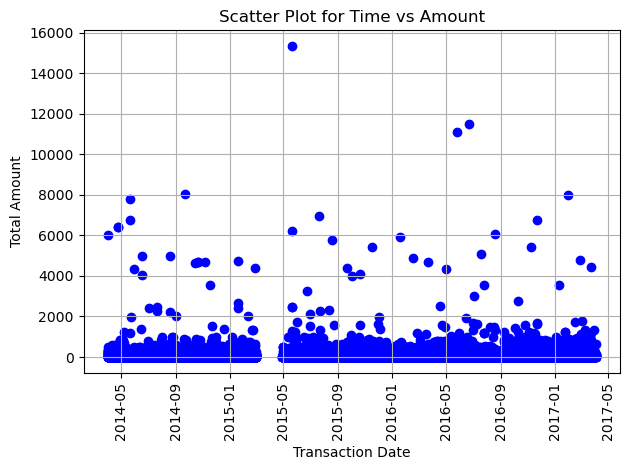

In [618]:
plt.scatter(df_b['Transaction Date'], df_b['Total'], color='blue', marker='o')
plt.title('Scatter Plot for Time vs Amount')
plt.xlabel('Transaction Date')
plt.ylabel('Total Amount')
plt.grid(True)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [619]:
min_total = df_b['Total'].min()
max_total = df_b['Total'].max()

print("Minimum value of Total column:", min_total)
print("Maximum value of Total column:", max_total)


Minimum value of Total column: 0.0
Maximum value of Total column: 15340.8


In [620]:
df_b.head(2)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,original_df_number,Year
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,2016-12-05,10510.0,45.00,Q4,2,2016
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,2016-12-05,10509.0,426.57,Q4,2,2016


In [621]:
# checking how many account types are there
df_b['Account Description'].unique()

array(['Books-CDs-Audio-Video', 'Consumable Catering Supplies',
       'CSG  - IT', 'Electricity', 'Equipment and Materials Purcha',
       'General Office Expenses', 'Non Education Staff GPay',
       'Other Agencies - Third Party P', 'Other Services', 'Postage',
       'Rents', 'Stationery', 'Training', 'Travelling Expenses',
       'Venue Hire', 'Clothing - Protective Clothing',
       'Equipment and Materials Repair', 'Equipment Hire',
       'Fixtures and fittings', 'Food Costs', 'Hardware Purchases',
       'Laundry and Dry Cleaning', 'Miscellaneous Expenses',
       'NNDR Collected', 'Other Indirect Employee Expens',
       'Other Vehicle Costs', 'Parking Permit Fees', 'Subsistence',
       'Transport Hire Charges', 'Ttl IT & Comms',
       'Vehicle Running Costs', 'Conference Expenses',
       'Software Licences & Support', 'Subscriptions', 'Advertising',
       'Advertising for staff', 'Building Repairs & Maintenance',
       'Cleaning and domestic material', 'Fees and Charges

In [622]:
df_b['Creditor'].unique()

array(['AMAZON EU', 'AMAZON UK MARKETPLACE', 'AMAZON UK RETAIL AMAZO',
       ..., 'WWW.KLVSTUDIO.COM', 'WWW.SMYTHSTOYS.COM',
       'www.1st4footballtic'], dtype=object)

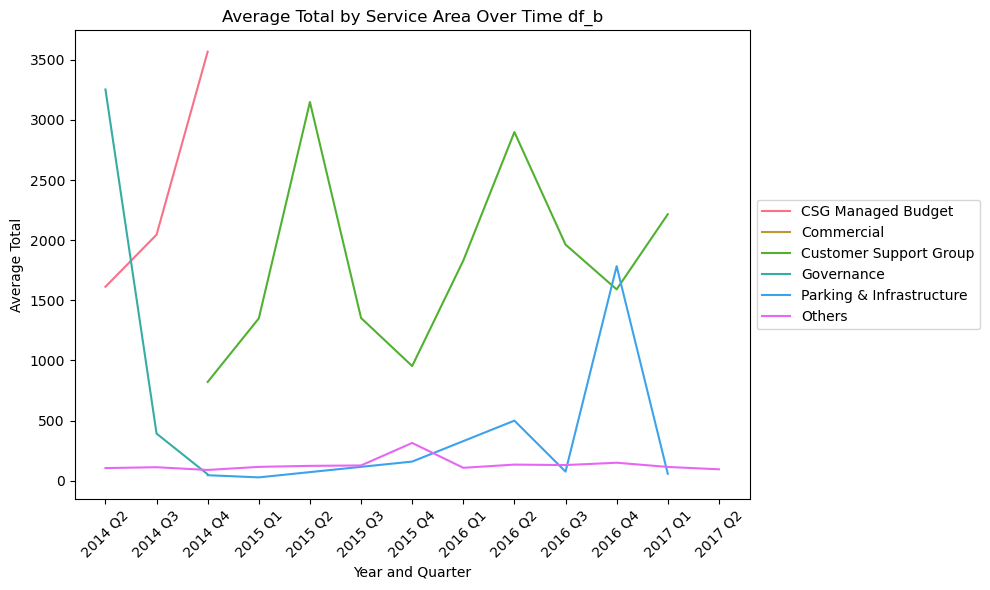

In [623]:
df_b['Transaction Date'] = pd.to_datetime(df_b['Transaction Date'])

df_b['Year'] = df_b['Transaction Date'].dt.year
df_b['Quarter'] = df_b['Transaction Date'].dt.quarter

# Group by 'Service Area', 'Year', and 'Quarter' and calculate average of 'Total'
grouped_data = df_b.groupby(['Service Area', 'Year', 'Quarter'])['Total'].mean().reset_index()

# Creating a new column combining year and quarter in the desired format
grouped_data['YearQuarter'] = grouped_data['Year'].astype(int).astype(str) + ' Q' + grouped_data['Quarter'].astype(int).astype(str)

# top 5 service areas by average total
top_5_service_areas = grouped_data.groupby('Service Area')['Total'].mean().nlargest(5).index

# Filtering data for top 5 service areas
top_5_data = grouped_data[grouped_data['Service Area'].isin(top_5_service_areas)]

# Grouping remaining service areas as 'Others'
others_data = grouped_data[~grouped_data['Service Area'].isin(top_5_service_areas)]
others_data = others_data.groupby(['YearQuarter', 'Year', 'Quarter']).mean().reset_index()
others_data['Service Area'] = 'Others'

# Combining top 5 data and 'Others' data
combined_data = pd.concat([top_5_data, others_data], ignore_index=True)

# Plotting
plt.figure(figsize=(10, 6))

# Defining a color palette for different service areas
palette = sns.color_palette('husl', n_colors=len(combined_data['Service Area'].unique()))

for i, area in enumerate(combined_data['Service Area'].unique()):
    area_data = combined_data[combined_data['Service Area'] == area]
    plt.plot(area_data['YearQuarter'], area_data['Total'], label=area, color=palette[i])

plt.xlabel('Year and Quarter')
plt.ylabel('Average Total')
plt.title('Average Total by Service Area Over Time df_b')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


In [624]:
df_a.head(3)

,FIN.TRANSACTION DATE,FIN.POSTING DATE,FIN.TRANSACTION AMOUNT,MCH.MERCHANT NAME,MCH.CITY NAME,FIN.ORIGINAL ISO CURRENCY CODE SYMBOL,FIN.INET CONVERSION,Quarter
0,2017-04-06,07/04/17,36.55,TESCO STORE 2296,COLNEY HATCH,GBP,1.0,Q2
1,2017-04-06,07/04/17,58.75,AMFBOWLING.CO.UK,01442 840200,GBP,1.0,Q2
2,2017-04-10,11/04/17,40.50,WWW.GOJUMPIN.COM,INTERNET,GBP,1.0,Q2


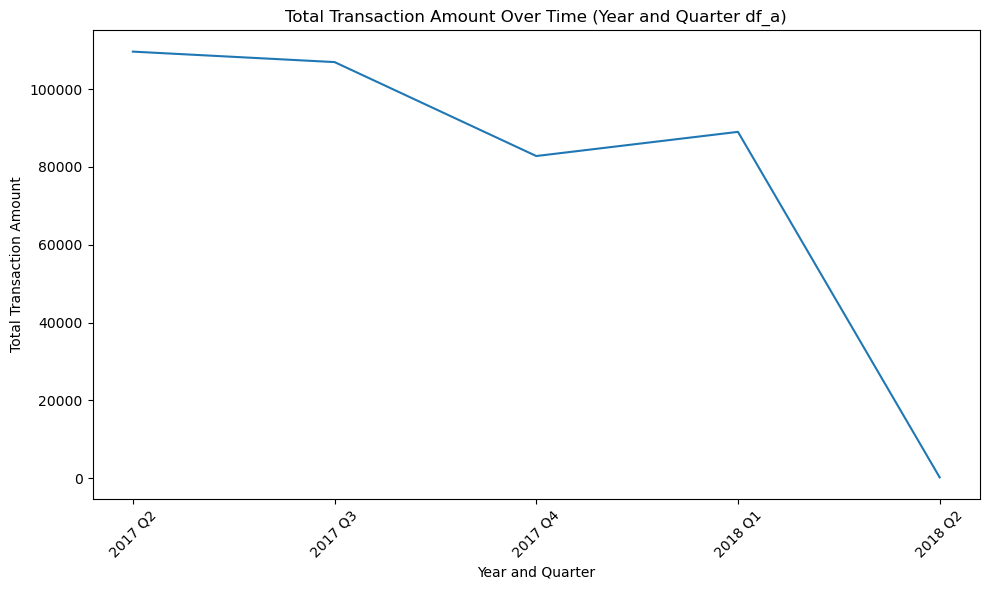

In [625]:
df_a['FIN.TRANSACTION DATE'] = pd.to_datetime(df_a['FIN.TRANSACTION DATE'])

# Extracting year from 'FIN.TRANSACTION DATE'
df_a['Year'] = df_a['FIN.TRANSACTION DATE'].dt.year

# Group by 'Year' and 'Quarter' and calculate sum of 'FIN.TRANSACTION AMOUNT'
grouped_data = df_a.groupby(['Year', 'Quarter'])['FIN.TRANSACTION AMOUNT'].sum().reset_index()

# Combining 'Year' and 'Quarter' into a single string for x-axis
grouped_data['YearQuarter'] = grouped_data['Year'].astype(str) + ' ' + grouped_data['Quarter']

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the line chart
sns.lineplot(data=grouped_data, x='YearQuarter', y='FIN.TRANSACTION AMOUNT')

plt.xlabel('Year and Quarter')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount Over Time (Year and Quarter df_a)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()


In [626]:
df_a['FIN.TRANSACTION DATE'] = pd.to_datetime(df_a['FIN.TRANSACTION DATE'])

df_a['Year'] = df_a['FIN.TRANSACTION DATE'].dt.year
df_a['Quarter'] = df_a['FIN.TRANSACTION DATE'].dt.quarter

grouped_data = df_a.groupby(['Year', 'Quarter'])['FIN.TRANSACTION AMOUNT'].sum().reset_index()

grouped_data['YearQuarter'] = grouped_data['Year'].astype(str) + ' Q' + grouped_data['Quarter'].astype(str)

# Display table
transaction_summary = grouped_data[['YearQuarter', 'FIN.TRANSACTION AMOUNT']]
transaction_summary.columns = ['Year and Quarter', 'Total Transaction Amount']
print(transaction_summary)


  Year and Quarter  Total Transaction Amount
0          2017 Q2                 109632.92
1          2017 Q3                 106944.23
2          2017 Q4                  82809.00
3          2018 Q1                  89017.25
4          2018 Q2                    243.21


## Q3

The Auditor would like to get an understanding of how Creditors are classified into accounts. In particular, they are worried about transaction misclassification. Are you able to identify instances in which Creditors are not consistently classified into Accounts (e.g., most of the time Creditor “AirTickets.com” is classified into “Travelling Expenses”, but on some occasions it is also found in “Miscellaneous”)? 

## Exploring Creditor Classification

In [627]:
df_a.head(2)

,FIN.TRANSACTION DATE,FIN.POSTING DATE,FIN.TRANSACTION AMOUNT,MCH.MERCHANT NAME,MCH.CITY NAME,FIN.ORIGINAL ISO CURRENCY CODE SYMBOL,FIN.INET CONVERSION,Quarter,Year
0,2017-04-06,07/04/17,36.55,TESCO STORE 2296,COLNEY HATCH,GBP,1.0,2,2017
1,2017-04-06,07/04/17,58.75,AMFBOWLING.CO.UK,01442 840200,GBP,1.0,2,2017


In [628]:
df_b.head(2)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,original_df_number,Year
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,2016-12-05,10510.0,45.00,4,2,2016
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,2016-12-05,10509.0,426.57,4,2,2016


In [629]:
df_b['Creditor'].unique()

array(['AMAZON EU', 'AMAZON UK MARKETPLACE', 'AMAZON UK RETAIL AMAZO',
       ..., 'WWW.KLVSTUDIO.COM', 'WWW.SMYTHSTOYS.COM',
       'www.1st4footballtic'], dtype=object)

In [630]:
creditor_account_summary = df_b.groupby('Creditor')['Account Description'].nunique().reset_index(name='Unique Account Descriptions')

inconsistent_classifications = creditor_account_summary[creditor_account_summary['Unique Account Descriptions'] > 1]

inconsistent_classifications_sorted = inconsistent_classifications.sort_values(by='Unique Account Descriptions', ascending=False)

# Displaying the sorted summary table
print("Summary of inconsistent classifications (sorted by highest to lowest unique account descriptions):")
print(inconsistent_classifications_sorted)


Summary of inconsistent classifications (sorted by highest to lowest unique account descriptions):
                                  Creditor  Unique Account Descriptions
69                   AMAZON UK MARKETPLACE                           25
66                               AMAZON EU                           18
72                  AMAZON UK RETAIL AMAZO                           15
68                  AMAZON SVCS EUROPE,SAR                           14
122                        ASDA SUPERSTORE                           13
108                     ARGOS RETAIL GROUP                           10
821                     LUL TICKET MACHINE                            9
106                              ARGOS LTD                            9
139                    Amazon Mktplce EU-U                            8
1139                   POST OFFICE COUNTER                            8
67                            AMAZON PRIME                            8
1574                     TVLICENSING.

In [631]:
# Grouping by 'Creditor' and aggregate the number of unique 'Account Description'
creditor_account_summary = df_b.groupby('Creditor')['Account Description'].agg(['nunique', lambda x: ', '.join(x.unique())]).reset_index()
creditor_account_summary.columns = ['Creditor', 'Unique Account Descriptions Count', 'Associated Account Descriptions']

# Filtering for creditors with more than one unique account description
inconsistent_classifications = creditor_account_summary[creditor_account_summary['Unique Account Descriptions Count'] > 1]

# Sorting by the number of unique account descriptions in descending order

inconsistent_classifications_sorted = inconsistent_classifications.sort_values(by='Unique Account Descriptions Count', ascending=False)

inconsistent_classifications_sorted.set_index('Creditor', inplace=True)

print("Summary of inconsistent classifications (sorted by highest to lowest unique account descriptions):")
display(inconsistent_classifications_sorted)


Summary of inconsistent classifications (sorted by highest to lowest unique account descriptions):


,Unique Account Descriptions Count,Associated Account Descriptions
Creditor,,
AMAZON UK MARKETPLACE,25,"Books-CDs-Audio-Video, CSG - IT, Equipment an..."
AMAZON EU,18,"Books-CDs-Audio-Video, Equipment and Materials..."
AMAZON UK RETAIL AMAZO,15,"Books-CDs-Audio-Video, CSG - IT, Stationery, ..."
"AMAZON SVCS EUROPE,SAR",14,"Equipment and Materials Purcha, Consumable Cat..."
ASDA SUPERSTORE,13,"Books-CDs-Audio-Video, Building Repairs & Main..."
ARGOS RETAIL GROUP,10,"Equipment and Materials Purcha, Stationery, Fo..."
LUL TICKET MACHINE,9,"Non Education Staff GPay, Training, Travelling..."
ARGOS LTD,9,"Books-CDs-Audio-Video, Equipment and Materials..."
Amazon Mktplce EU-U,8,"Equipment and Materials Purcha, Books-CDs-Audi..."


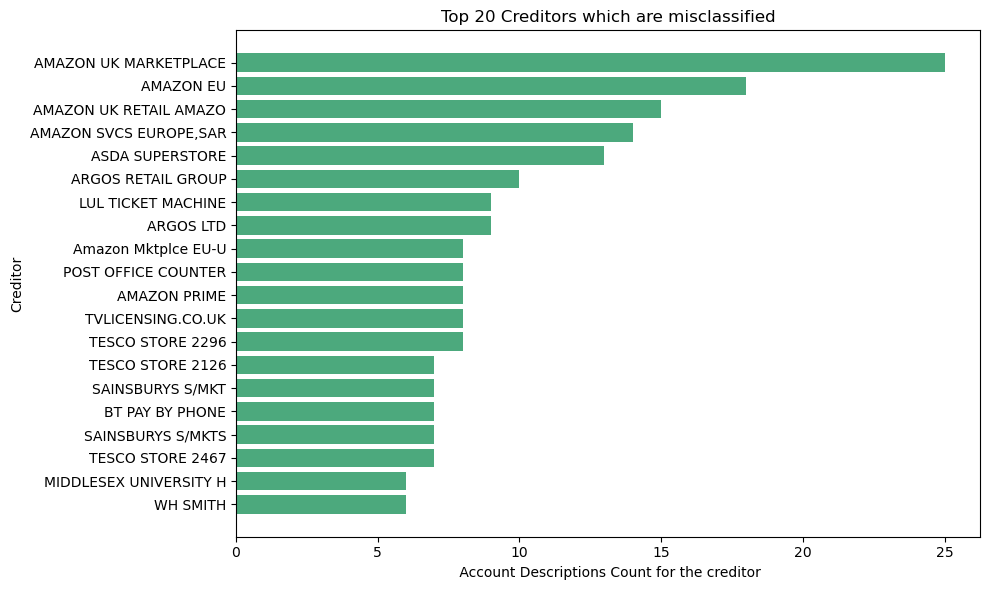

In [632]:
# Get top 20 creditors based on Unique Account Descriptions Count
top_creditors = inconsistent_classifications_sorted.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_creditors.index, top_creditors['Unique Account Descriptions Count'], color='#4CA97D')
plt.xlabel(' Account Descriptions Count for the creditor')
plt.ylabel('Creditor')
plt.title('Top 20 Creditors which are misclassified')
plt.gca().invert_yaxis()  # Inverting y-axis to display highest count at the top
plt.tight_layout()

plt.show()


## Q5

The auditor has heard that you may know anomaly detection techniques. They would like to ask you for a sample of a few hundred transactions that are anomalous, different or worthwhile inquiring about.  The sample should include at least five transactions for each Service Area. Please provide this sample and explain why they are special or different.

## Applying Anamoly Detection technique to identify unusual transactions

In [633]:
df_b.columns

Index(['Service Area', 'Account Description', 'Creditor', 'Transaction Date',
       'Journal Reference', 'Total', 'Quarter', 'original_df_number', 'Year'],
      dtype='object')

In [634]:
# Initializing an empty DataFrame to store anomalous transactions
anomalous_transactions = pd.DataFrame(columns=df_b.columns)

# Initializing and fitting Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)

# Dictionary to map comments with their corresponding criteria
comments = {
    'Unusually high transaction amount.': 'Total',
    'Transaction with unusual combination of features.': ['Account Description', 'Creditor', 'Transaction Date', 'Journal Reference', 'Total'],
    'Transaction date is outside expected range.': 'Transaction Date',
    'Unexpected journal reference associated with the transaction.': 'Journal Reference',
    'Outlier in terms of total amount compared to other transactions in the same area.': 'Total'
}

# Iterating over the comments dictionary
for comment, criteria in comments.items():
    # Fit Isolation Forest model on the data based on the specific criteria
    if isinstance(criteria, list):
        numeric_criteria = [col for col in criteria if df_b[col].dtype in ['int64', 'float64']]
        model.fit(df_b[numeric_criteria])
    else:
        if df_b[criteria].dtype in ['int64', 'float64']:
            model.fit(df_b[[criteria]])
        else:
            continue
    
    # Predicting outliers/anomalies
    anomaly_pred = model.predict(df_b[numeric_criteria] if isinstance(criteria, list) else df_b[[criteria]])
    
    # Filtering out anomalies
    anomalies = df_b[anomaly_pred == -1]
    
    # Sample at most 5 transactions for the current comment
    sampled_anomalies = anomalies.groupby('Service Area').head(5)
    
    # Adding comments to the sampled anomalies
    sampled_anomalies['Comment'] = comment
    
    # Append sampled anomalies to the anomalous_transactions DataFrame
    anomalous_transactions = anomalous_transactions.append(sampled_anomalies)

# # Display the anomalous transactions
# print("Anomalous Transactions:")
# print(anomalous_transactions)


In [635]:
# Displaying each service area's anamolous transactions

In [636]:
# Rearranging the column order for better visibility
anomalous_transactions = anomalous_transactions[['Comment', 'Service Area', 'Account Description', 'Creditor', 'Transaction Date', 'Journal Reference', 'Total']]

# Reset the index to start from 1 and increase sequentially
anomalous_transactions.reset_index(drop=True, inplace=True)

# Display the anomalous transactions using IPython.display
print("Anomalous Transactions:")
display(anomalous_transactions)


Anomalous Transactions:


,Comment,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total
0,Unusually high transaction amount.,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,2016-12-05,10509.0,426.57
1,Unusually high transaction amount.,Adults and Communities,Electricity,E.ON ENERGY SOLUTIONS,2017-01-11,11245.0,3569.03
2,Unusually high transaction amount.,Adults and Communities,Other Agencies - Third Party P,HOLIDAY INNS,2016-12-09,10578.0,830.00
3,Unusually high transaction amount.,Adults and Communities,Other Agencies - Third Party P,HOLIDAY INNS,2016-11-22,10349.0,1670.30
4,Unusually high transaction amount.,Adults and Communities,Other Agencies - Third Party P,HOLIDAY INNS,2016-11-22,10350.0,1625.00
5,Unusually high transaction amount.,Assurance,Equipment and Materials Purcha,PP HIREWITNESS,2016-07-15,8752.0,370.00
6,Unusually high transaction amount.,Assurance,Equipment Hire,MARQUEE CARPETS LIMITE,2016-06-30,8598.0,1315.20
7,Unusually high transaction amount.,Assurance,Fixtures and fittings,MARQUEE CARPETS LIMITEWALTHAM CROSS,2016-08-19,9175.0,1315.20
8,Unusually high transaction amount.,Assurance,Miscellaneous Expenses,CLOTHES 2 ORDER,2016-06-06,8284.0,880.50
9,Unusually high transaction amount.,Assurance,Miscellaneous Expenses,ROYAL MAIL,2016-12-19,10707.0,392.40


## Summary and Conclusion

In this project, I have analyzed corporate credit card transactions published by the London Borough of Barnet across different time periods. I began by carefully inspecting the data and performing initial data preprocessing steps. One of the key tasks was merging data from three separate CSV files into a single dataset, consolidating information for comprehensive analysis.

Throughout the analysis, I utilized various preprocessing techniques to clean and organize the data effectively. This included handling missing values, removing duplicates, and ensuring consistency across the dataset. By merging the datasets, I streamlined the data preparation process, enabling seamless analysis.

In addition to data preprocessing, I employed basic visualization techniques to gain insights from the data. I created a variety of graphs and charts, including bar graphs, line charts, pie charts, and scatter plots, to visually represent different aspects of the data. These visualizations provided valuable insights into trends, patterns, and relationships within the dataset.

During the analysis, I encountered challenges such as misclassification of creditors. To address this issue, I conducted testing and identification of misclassified creditors, ensuring the accuracy of the analysis results.

Furthermore, I implemented anomaly detection techniques to identify unusual transactions within the dataset. By applying these techniques, I was able to pinpoint transactions that deviated significantly from the norm, potentially indicating fraudulent or erroneous activities.

Overall, this project provided valuable learning experiences in dealing with real-world data. Through careful analysis and visualization, I gained insights into corporate credit card transactions and learned how to effectively preprocess and analyze complex datasets.

## References:

Liu, Fei Tony & Ting, Kai & Zhou, Zhi-Hua. (2009). Isolation Forest. 413 - 422. 10.1109/ICDM.2008.17. 

 ***********The end*****************